In [3]:
#imports
import sys
import os
from os.path import join
import glob
import pandas as pd
import numpy as np
import time
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load data
dataroot = '/content/drive/MyDrive/IDS(attacks&Defense)'
SEED=2

In [6]:
df_data=pd.read_csv("/content/drive/MyDrive/CICIDS2017/data_set.csv")
df_data.shape

(2830743, 79)

In [7]:
df = df_data.sample(frac =.5, random_state = np.random.permutation(len(df_data)))
#df = df_data
print (df.shape)
#df.describe()
del df_data

(1415372, 79)


In [8]:
#df = df[:5000]
#df.shape

In [9]:
#df.info()

In [10]:
#df.head()

In [11]:
# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
df.isnull().sum().sum()

632

In [12]:
# from matplotlib.pyplot import figure
# figure(figsize=(12, 3), dpi=80)
# df.isna().sum().plot(kind='bar')

In [13]:
q1 = df.loc[df['Label'] == 'Web Attack-Sql Injection'] #[['num','val']]
q1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1612939,80,48,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613284,80,78,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613336,80,5009041,4,4,523,530,523,0,130.75,261.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614650,80,5005388,5,3,599,2021,599,0,119.80,267.880944,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614224,80,73,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612094,80,5069927,4,4,460,1840,460,0,115.00,230.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613380,80,71,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1615007,80,73,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612468,80,43,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection


In [14]:
q2 = df.loc[df['Label'] == 'Heartbleed'] #[['num','val']]
q2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2735317,444,119297996,2782,2089,9368,7882432,1448,0,3.367362,30.505030,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735762,444,119257653,2802,2067,20858,7812389,5792,0,7.443969,126.045811,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735576,444,119259012,2801,2069,12264,7879536,4344,0,4.378436,83.107845,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735305,444,119260295,2791,2114,13712,7878088,5792,0,4.912934,110.396187,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735215,444,119262215,2792,2110,13712,7878135,5792,0,4.911175,110.376448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735865,444,24719667,590,436,7442,1636683,5792,0,12.613559,238.708658,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735847,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


In [15]:
q3 = df.loc[df['Label'] == 'Infiltration'] #[['num','val']]
q3

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1318727,444,116393329,504,504,171452,3024,1027,6,340.182540,232.817897,...,20,2.190000e+07,0.000000e+00,21900000,21900000,41500000.0,0.000000e+00,41500000,41500000,Infiltration
1306797,444,119973135,4376,4374,2321478,26244,1273,6,530.502285,262.768815,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1417935,444,69483113,20,20,3734,120,705,6,186.700000,226.954691,...,20,5.674800e+05,1.267984e+04,576446,558514,33900000.0,2.990000e+07,55000000,12800000,Infiltration
1317024,444,69365637,1031,1031,307939,6186,1271,6,298.679922,270.071527,...,20,1.640000e+07,0.000000e+00,16400000,16400000,13900000.0,0.000000e+00,13900000,13900000,Infiltration
1367615,444,69714525,20,20,3737,120,705,6,186.850000,227.161032,...,20,5.575790e+05,1.131371e+01,557587,557571,34000000.0,2.970000e+07,55000000,13000000,Infiltration
1454069,444,48450959,7,8,1959,48,963,6,279.857143,369.463317,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1321496,444,18897509,8,0,7366,0,1460,6,920.750000,634.234015,...,20,9.296999e+06,0.000000e+00,9296999,9296999,9600510.0,0.000000e+00,9600510,9600510,Infiltration
1359302,444,100460141,26,26,5776,156,1002,6,222.153846,304.565224,...,20,5.684117e+05,5.121990e+03,574107,564183,32700000.0,1.910000e+07,54800000,21400000,Infiltration
1308202,444,119974830,3398,3398,1645814,20643,1153,0,484.347852,302.057454,...,20,8.243630e+05,0.000000e+00,824363,824363,9785751.0,0.000000e+00,9785751,9785751,Infiltration
1305744,444,119991834,5523,5525,2866110,33406,1274,0,518.940793,204.203530,...,20,9.978420e+05,8.314713e+05,1585781,409903,8143987.5,1.821774e+06,9432176,6855799,Infiltration


In [16]:
df_label = df['Label']

In [17]:
# change the label column
df_label = df_label.replace({ 'Web Attack-Sql Injection' : 'Web Attack', 
                               'Heartbleed' : 'Web Attack',
                               'Infiltration' : 'Web Attack',
                               'Web Attack-Brute Force' : 'Web Attack',
                               'Web Attack-XSS' : 'Web Attack'
                               })

In [18]:
# dropping bad columns, they coause issues due to large numbers
data = df.drop(columns=['Flow Packets/s','Flow Bytes/s', 'Label'])
del df

#filling missing features
data.fillna(data.mean(), inplace=True)

#convert data to numeric
data = data.astype(float).apply(pd.to_numeric)

# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
data.isnull().sum().sum()

0

In [19]:
# print label distribution
pd.DataFrame(df_label.value_counts()).to_csv('class_distribution.csv')
df_label.value_counts()

BENIGN              1136533
DoS Hulk             115184
PortScan              79656
DDoS                  64223
DoS GoldenEye          5104
FTP-Patator            3961
SSH-Patator            2969
DoS slowloris          2905
DoS Slowhttptest       2754
Web Attack             1087
Bot                     996
Name: Label, dtype: int64

In [20]:
label_names = pd.Series(df_label, name='Label').unique()
label_names

array(['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye',
       'FTP-Patator', 'DoS Slowhttptest', 'SSH-Patator', 'DoS slowloris',
       'Bot', 'Web Attack'], dtype=object)

In [21]:
#,'Infiltration' ,'Web Attack-Sql Injection',

In [22]:
len (label_names)

11

In [23]:
data.shape

(1415372, 76)

# Data Imbalance

In [24]:
def make_value2index(attacks):
    #make dictionary
    attacks = sorted(attacks)
    d = {}
    counter=0
    for attack in attacks:
        d[attack] = counter
        counter+=1
    return d

In [25]:
# chganges label from string to integer/index
def encode_label(Y_str):
    labels_d = make_value2index(np.unique(Y_str))
    Y = [labels_d[y_str] for y_str  in Y_str]
    Y = np.array(Y)
    return np.array(Y)

In [26]:
X = data.values
y = encode_label(df_label.values)

del data

In [27]:
# normalization
def normalize(data):
    data = data.astype(np.float32)       
    eps = 1e-15
    mask = data==-1
    data[mask]=0
    mean_i = np.mean(data,axis=0)
    min_i = np.min(data,axis=0) #  to leave -1 (missing features) values as is and exclude in normilizing
    max_i = np.max(data,axis=0)
    r = max_i-min_i+eps
    data = (data-mean_i)/r  # zero centered 
    #deal with missing features -1
    data[mask] = 0        
    return data

In [28]:
X = normalize(X)

In [29]:
def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns    
    result = np.zeros((x.shape[0], 81))
    result[:, :-5] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0] ,-1, 9, 9 ))
    #result = result[..., tf.newaxis]
    return result

In [30]:
X = reshape_dataset_cnn(X)
X.shape , y.shape

((1415372, 1, 9, 9), (1415372,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1132297, 1, 9, 9), (1132297,), (283075, 1, 9, 9), (283075,))

In [32]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


# CNN Model

In [33]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
from torch.utils.data import TensorDataset

from tqdm import tqdm
import torch.nn.functional as F

In [34]:
class MnistCNN(nn.Module):

    def __init__(self,input_dim,num_classes):
        super(MnistCNN, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(1, 32, 3,1)
        self.conv2 = nn.Conv2d(32, 64, 3 ,1)
        self.fc3 = nn.Linear(64, 64)
        #self.fc4 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(input_dim*64,num_classes)
        #fc_layers.append(nn.Linear(input_dim*128,num_classes))
        
    def forward(self, x):    
        h = F.relu(self.conv1(x))        
        h = F.relu(self.conv2(h))        
        h = F.dropout2d(F.max_pool2d(h, 5), p=0.25)
        h = F.dropout2d(self.fc3(h.view(h.size(0), -1)), p=0.5)
        h = self.fc4(h)
        return F.log_softmax(h,dim=1)

class CifarCNN(nn.Module):

    def __init__(self , num_classes):
        super(CifarCNN, self).__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, num_classes)

    def forward(self, x):
        h = F.relu(self.bn1(self.conv1(x)))        
        h = F.relu(self.bn2(self.conv2(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn3(self.conv3(h)))   
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn4(self.conv4(h)))        
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.fc5(h.view(h.size(0), -1)))
        h = F.relu(self.fc6(h))
        h = self.fc7(h)
        return F.log_softmax(h,dim=1)

In [35]:
def accuracy(y, t):
    pred = y.data.max(1, keepdim=True)[1]
    acc = pred.eq(t.data.view_as(pred)).cpu().sum()
    return acc

In [36]:
def fgsm(model, x, t, loss_func, eps, min=0, max=1):
    if not isinstance(x, Variable):
        x, t = Variable(x.cuda(), requires_grad=True), Variable(t.cuda())
    x.requires_grad = True
    y = model(x)
    loss = loss_func(y, t)
    model.zero_grad()
    loss.backward(retain_graph=True)

    return Variable(torch.clamp(x.data + eps * torch.sign(x.grad.data), min=min, max=max))

In [37]:
#data ="minst"
epochs = 1
lr= 0.01
milestones = [50, 75]
gamma = 0.1
batch_size = 128
input_dim = X_train.shape[1]
num_class = len(np.unique(df_label))
eps = 0.15

In [38]:
tensor_x_train = torch.stack([torch.Tensor(i) for i in X_train]).to(device)
tensor_y_train = torch.LongTensor(y_train).to(device) 

train_data = TensorDataset(tensor_x_train,tensor_y_train)     
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)      


tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]).to(device)
tensor_y_test = torch.LongTensor(y_test).to(device) 

test_data = TensorDataset(tensor_x_test,tensor_y_test)     
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)       

In [39]:
model = MnistCNN(input_dim=input_dim  , num_classes=num_class)
print (model)

#model = CifarCNN(num_classes=num_class)
#print (model)

MnistCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=11, bias=True)
)


In [40]:
train_accu = []
adv_accu   = []

model.load_state_dict(torch.load("/content/drive/MyDrive/IDS(attacks&Defense)/models/MnistCNN.tar")["state_dict"])
model.eval()
loss_func = nn.CrossEntropyLoss().cuda()

# Generate Adversarial Examples
print("-" * 30)
print("Genrating Adversarial Examples ...")
for e in range(epochs):
    train_acc, adv_acc, train_n = 0, 0, 0
    normal_data_x, normal_data_t, adv_data = None, None, None

    for x, t in tqdm(train_loader, total=len(train_loader), leave=False):
        x, t = Variable(x.to(device)), Variable(t.to(device))
        y = model(x)
        train_acc += accuracy(y, t)

        x_adv = fgsm(model, x, t, loss_func, eps)
        y_adv = model(x_adv)
        adv_acc += accuracy(y_adv, t)
        train_n += t.size(0)

        x, t, x_adv = x.data, t.data, x_adv.data
        if normal_data_x is None:
            normal_data_x, normal_data_t, adv_data = x, t, x_adv
        else:
            normal_data_x = torch.cat((normal_data_x, x))
            normal_data_t = torch.cat((normal_data_t, t))
            adv_data = torch.cat((adv_data, x_adv))


        accu_train = train_acc / train_n * 100
        train_accu.append(accu_train)     

        accu_adv =  adv_acc / train_n * 100
        adv_accu.append(accu_adv)    


    print("Accuracy(normal) {:.6f}, Accuracy(FGSM) {:.6f}".format(accu_train ,  accu_adv) , flush=True)

    torch.save({"normal_data_x": normal_data_x, "normal_data_t":normal_data_t, "adv": adv_data}, "/content/drive/MyDrive/IDS(attacks&Defense)/models/fgsm.tar")


------------------------------
Genrating Adversarial Examples ...


  0%|          | 0/8847 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
                                                   

Accuracy(normal) 95.410919, Accuracy(FGSM) 33.337013


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

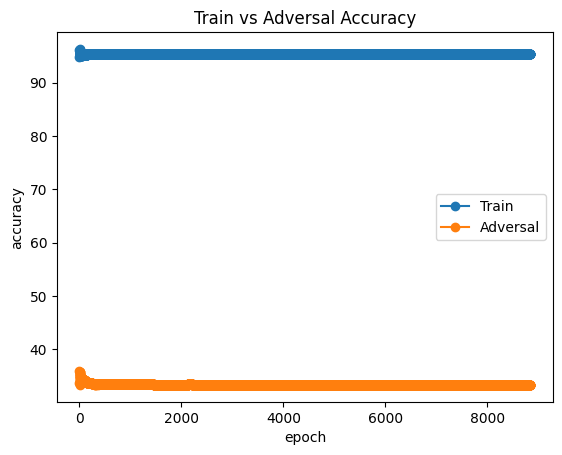

In [42]:
plt.plot(train_accu,'-o')
plt.plot(adv_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Adversal'])
plt.title('Train vs Adversal Accuracy')
 
plt.show()